In [102]:
import matplotlib.pyplot as plt
import numpy as np
#from linear_regression import MachineLearning
import pandas as pd


# $ {sigmoid} = \frac {1}{1+e^{-z}}$

As the coeff of z increases we see that the function looks more and more like a step function which could be directly used to push values to either a 1 or 0 making it easy to classify

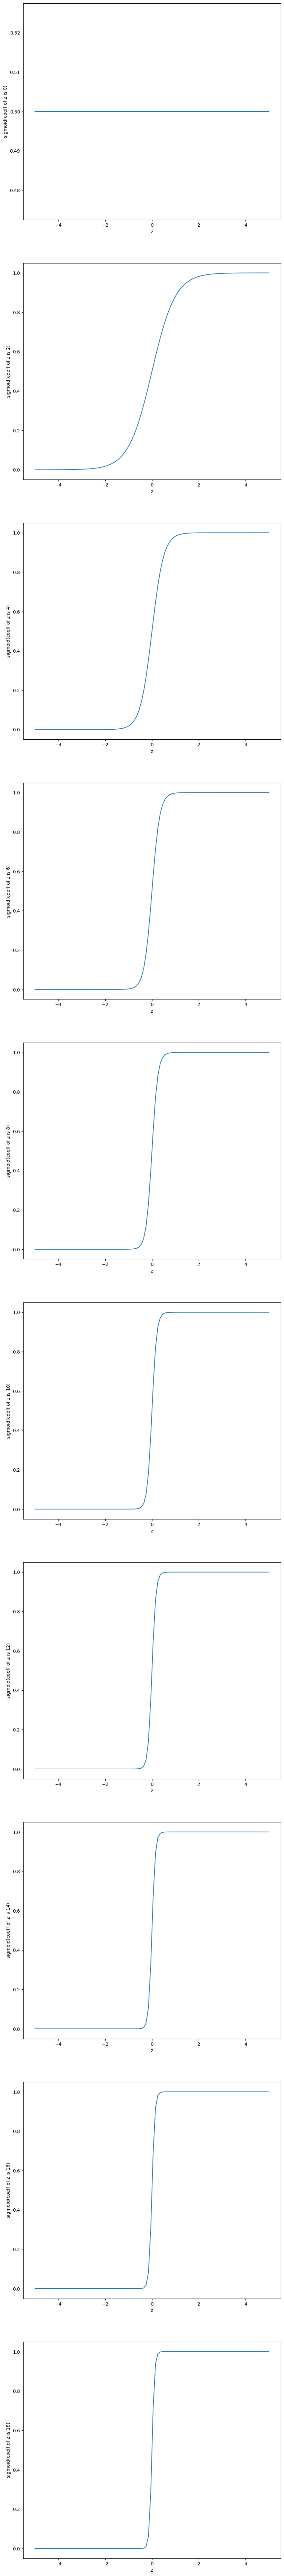

In [103]:
N = 10
Z = np.linspace(-5,5,100)

fig, ax = plt.subplots(N,figsize=(10,N*10))
for i in range(N):
    sigmoid = 1/(1+np.e**(-2*i*Z))
    ax[i].plot(Z,sigmoid)
    ax[i].set_xlabel('z')
    ax[i].set_ylabel(f'sigmoid(coeff of z is {2*i})')
plt.show()



In [113]:
class MachineLearning:
    def __init__(self, weight, X_train, y_train, X_test=np.array([]), y_test=np.array([])):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.weight = np.array(weight)
    
    def J_Logistic_Sigmoid(self,X,Y,W):
        sigmoid = 1/(1+np.e**(-(np.matmul(W,X))))
        data = np.multiply(-Y,np.log(sigmoid)) + np.multiply(-(1-Y),np.log(np.ones(np.shape(Y))-sigmoid))
        return 1/(np.shape((X))[1])*np.sum(data)
    
    def dJ_Logistic_Sigmoid(self,X,Y,W):
        #print(X.shape(),Y.shape(),W.shape())
        sigmoid = 1/(1+np.e**(-(np.matmul(W,X))))
        grad=[]
        for i in range(np.shape(X)[0]):
            data = np.multiply(sigmoid-Y,X[i])
            grad += [sum(data)]
        grad = np.array(grad)
        return 1/np.shape(X)[1]*grad 

    def LogisticRegression(self):
        tolerance = 0.007
        while tolerance < np.linalg.norm(np.array(self.dJ_Logistic_Sigmoid(self.X_train,self.y_train,self.weight))):
            self.weight = self.weight - 0.01*np.array(self.dJ_Logistic_Sigmoid(self.X_train,self.y_train,self.weight))
        return self.weight

In [134]:
df = pd.read_csv("Logistic_regression_ls.csv")
df.insert(loc = 0, column='bias', value=1)
#print(df)

      

df_array = df.to_numpy()
#print(df_array)
X = df_array.T[:-1]

Y = df_array.T[-1]

ml = MachineLearning([0,0,0],X,Y)
weights = ml.LogisticRegression()
print(weights)
print(ml.J_Logistic_Sigmoid(X,Y,weights))


[-9.15101859  1.20115127  1.18705724]
0.026429367308668513


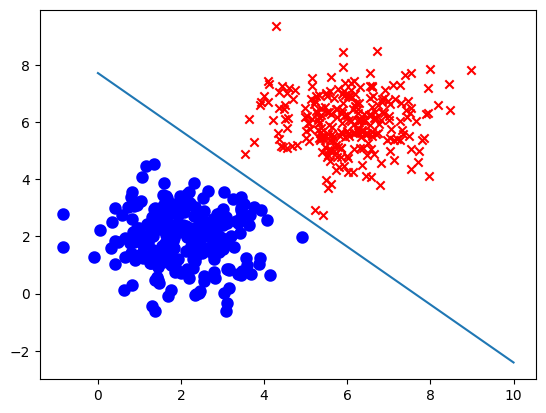

In [135]:
fig, ax= plt.subplots(1,1)
pos= Y==1
neg = Y==0
#ax.plot(X[1],X[2])
pos = pos.reshape(-1,)  
neg = neg.reshape(-1,)
pos_label="y=1"
neg_label="y=0"
ax.scatter(X[1:].T[pos, 0], X[1:].T[pos, 1], marker='x', c = 'red', label=pos_label)
ax.scatter(X[1:].T[neg, 0], X[1:].T[neg, 1], marker='o', c='blue', label=neg_label, facecolors='none', lw=3)
ax.plot(np.array([10,0]),-(weights[0]*np.array([1,1])+weights[1]*np.array([10,0]))/weights[2])
plt.show()

